# Visualizing sector allocations of a mutual fund through time

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

mfi <- MutualFundsIndia()

In [2]:
#Franklin India Prima Fund-Growth (https://github.com/stockviz/plutons/blob/master/mutual-fund-drawdown.R.ipynb)
scode <- 112932 
sname <- "Mirae Asset Emerging Bluechip Fund"

sectorAlloc <- mfi$Portfolio() %>%
    filter(SCHEME_CODE == scode 
           & INSTRUMENT == 'EQUITY' 
           & !is.null(WEIGHTAGE)
           & WEIGHTAGE > 0
           & (INSTRUMENT_TYPE == 'STOCK' | INSTRUMENT_TYPE == 'E' | INSTRUMENT_TYPE == '' | is.null(INSTRUMENT_TYPE))) %>%
    group_by(PORTFOLIO_DATE, SECTOR) %>%
    summarize(ALLOC = sum(WEIGHTAGE)) %>%
    arrange(PORTFOLIO_DATE, SECTOR) %>%
    collect() %>%
    ungroup() %>%
    mutate(PORTFOLIO_DATE = as.Date(PORTFOLIO_DATE))

saDf <- sectorAlloc %>%
    mutate(SECTOR = replace(SECTOR, SECTOR == '-' | is.na(SECTOR), 'UNK')) %>%
    as.data.frame()

saDf$SCALE <- scale(saDf$ALLOC)

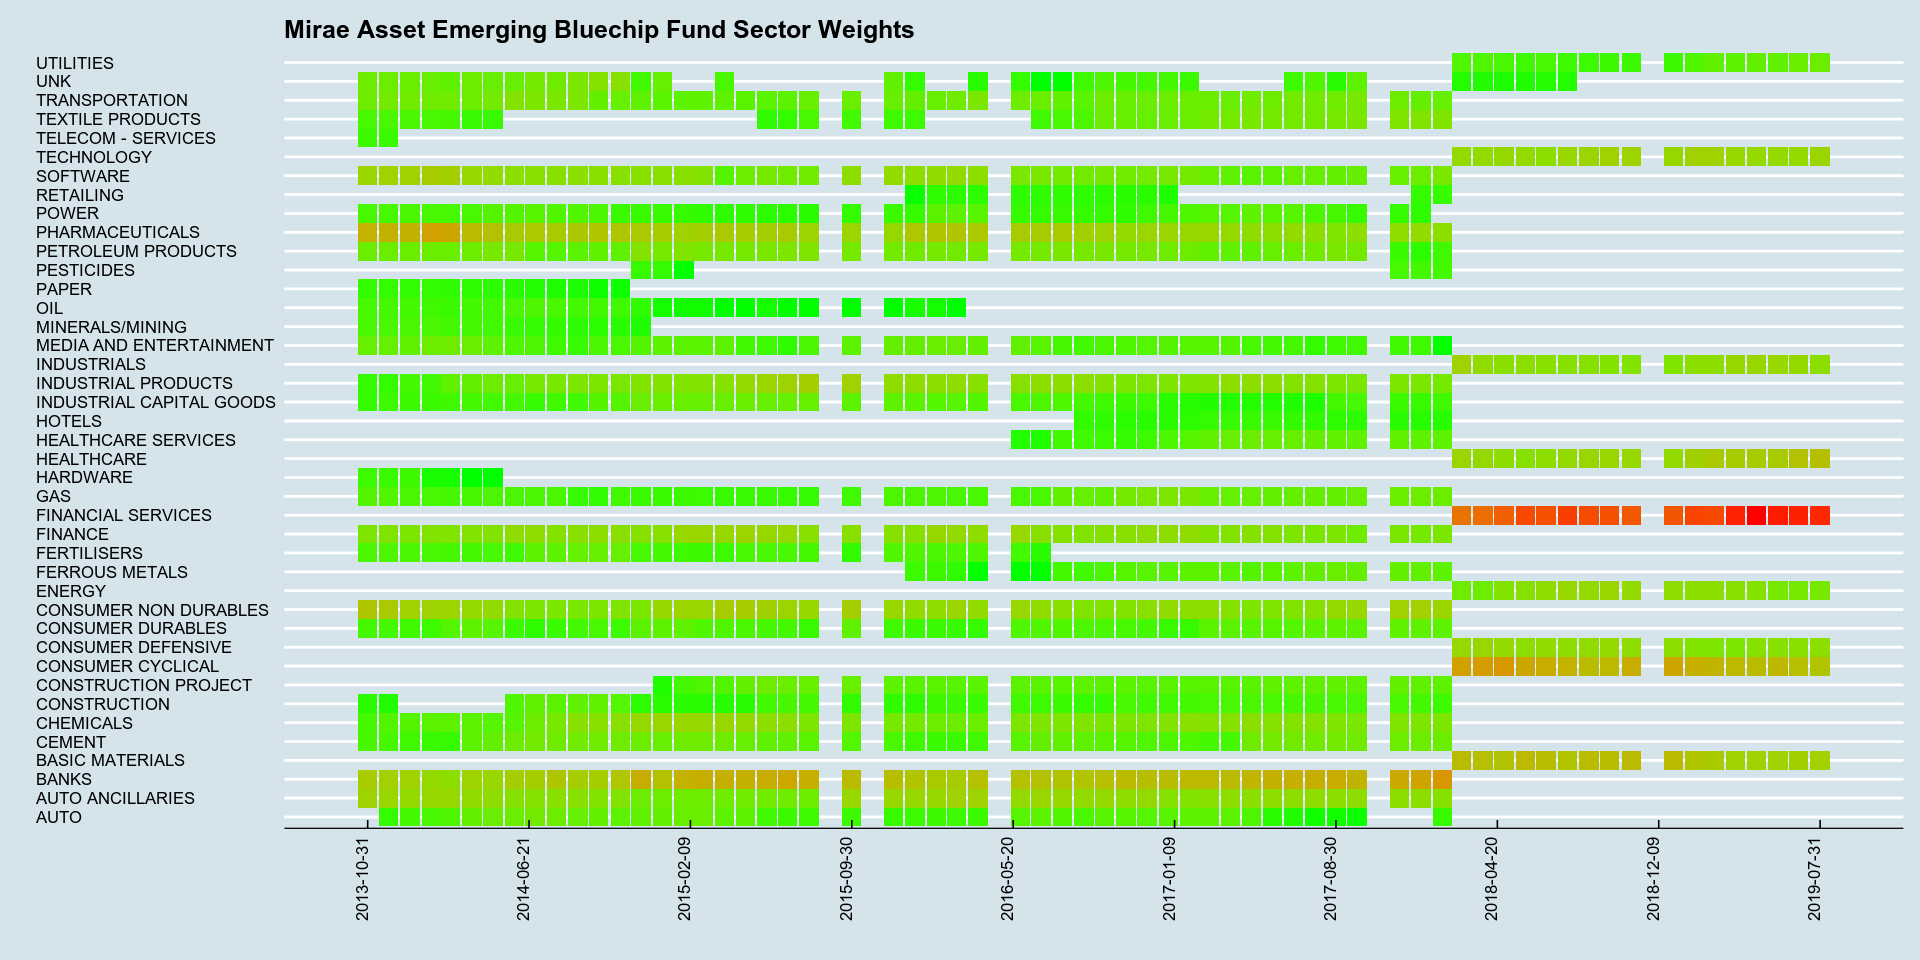

In [3]:
firstDate <- min(saDf$PORTFOLIO_DATE)
lastDate <- max(saDf$PORTFOLIO_DATE)
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)
                  
ggplot(saDf, aes(x = PORTFOLIO_DATE, y = SECTOR, fill = SCALE)) +
    theme_economist() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    geom_tile() +
    scale_x_date(breaks = xAxisTicks) +
    #geom_text(aes(label= sprintf("%.2f", ALLOC)), hjust = 1) +
    scale_fill_gradientn(colors=c("green", "red")) +
    guides(fill=F) +
    labs(x = "", y="", fill="", color="", title=sprintf("%s Sector Weights", sname)) 

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)